In [147]:
import numpy as np
import scipy.stats as stats
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

EXERCISE 1. The hourly wages in a particular industry are normally distributed with mean $13.20 and standard deviation $2.50. A company in this industry employs 40 workers, paying them an average of $12.20 per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test. (Wackerly, Ex.10.18)
CHECK: statistic: -2.5298221281347035, pvalue= 0.005706018193000826

In [152]:
mu=13.2
sigma=2.5
n=40
xbar=12.2

In [153]:
z=(xbar - mu) / (sigma / np.sqrt(n))
z

-2.5298221281347035

In [154]:
p_value= stats.norm.cdf(z)
p_value

0.005706018193000826

In [156]:
# We will compare the p-value with the 'α' value(.01)
# According to the rule if p_value < α, we should reject the null hypotesis.
α =.01
if p_value < α:
    print("Reject the null")
else:
    print("Fail to reject")

Reject the null


# EXERCISE 2.Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?
CHECK: statistic: 5.1681473319343345, pvalue= 2.593228732352821e-06



In [158]:
soils = pd.read_csv("soil.csv")
soils.head()

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371


In [159]:
soils["Soil1"]

0     1.442
1     1.943
2     1.110
3     1.912
4     1.553
5     1.641
6     1.499
7     1.347
8     1.685
9     1.578
10    1.866
11    1.653
12    1.665
13    1.640
14    1.976
15    1.754
16    1.589
17    1.976
18    1.863
19    1.932
20    1.570
21    1.613
22    2.054
23    1.550
24    1.714
25    1.896
26    1.737
27    1.740
28    1.708
29    1.548
30      NaN
31      NaN
32      NaN
33      NaN
34      NaN
Name: Soil1, dtype: float64

In [160]:
soils["Soil2"]

0     1.364
1     1.878
2     1.337
3     1.828
4     1.371
5     1.428
6     1.119
7     1.373
8     1.589
9     1.714
10    1.260
11    1.492
12    1.395
13    1.778
14    1.611
15    1.202
16    1.542
17    1.094
18    1.557
19    1.053
20    1.183
21    1.367
22    1.144
23    1.151
24    1.561
25    1.192
26    1.489
27    1.379
28    1.501
29    1.277
30    1.593
31    1.172
32    1.510
33    1.740
34    1.355
Name: Soil2, dtype: float64

In [161]:
x=soils["Soil1"].mean()
x

1.6918

In [162]:
y=soils["Soil2"].mean()
y

1.4171142857142855

#There are two independent samples. These are Soil1 and Soil2. Therefore, we should solve the problem according to the  T-test for the means of two independent samples of scores.
           
Ho : mu1 = mu2
H1 : mu1 <> mu2

scipy.stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=None, alternative='two-sided', trim=0)

In [163]:
stats.ttest_ind(soils["Soil1"], soils["Soil2"])

Ttest_indResult(statistic=nan, pvalue=nan)

In [164]:
soils.isnull()

,Soil1,Soil2
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [165]:
Ttest_ind=stats.ttest_ind(soils["Soil1"], soils["Soil2"], nan_policy='omit') # nan_policy = 'omit' performs the calculations ignoring nan values
Ttest_ind

Ttest_indResult(statistic=5.1681473319343345, pvalue=2.5932287323528147e-06)

In [166]:
Ttest_ind.statistic

5.1681473319343345

In [167]:
Ttest_ind.pvalue

2.5932287323528147e-06

In [168]:
# We will compare p_value with the α.
α = 0.01  # but α= α/2 => α = 0.05


In [169]:
if Ttest_ind.pvalue < α/2:
    print("Reject the Null")
else:
    print("Fail to reject")

Reject the Null


# EXERCISE 3. The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats.  2015 PISA Test Dataset 
1.	Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).
2.	Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.
CHECK: statistic=0.870055317967983, pvalue=0.38826888111307345



## 1.	Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).

In [170]:
pisa=pd.read_csv("2015pisa.csv")
pisa

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375
...,...,...,...,...,...,...
65,TUN,AF,48.519836,366.8180,361.0555,386.4034
66,TUR,EU,53.744979,420.4540,428.3351,425.4895
67,URY,SA,64.600000,417.9919,436.5721,435.3630
68,USA,NaN,74.554202,469.6285,496.9351,496.2424


In [171]:
pisa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country Code            70 non-null     object 
 1   Continent_Code          65 non-null     object 
 2   internet_users_per_100  70 non-null     float64
 3   Math                    70 non-null     float64
 4   Reading                 70 non-null     float64
 5   Science                 70 non-null     float64
dtypes: float64(4), object(2)
memory usage: 3.4+ KB


In [172]:
pisa.describe()

,internet_users_per_100,Math,Reading,Science
count,70.000000,70.000000,70.000000,70.000000
mean,71.973099,460.971557,460.997291,465.439093
std,16.390632,53.327205,49.502679,48.397254
min,21.976068,327.702000,346.549000,331.638800
25%,60.899020,417.416075,426.948625,425.923375
50%,72.999350,477.607150,480.199850,475.400050
75%,85.026763,500.482925,499.687475,502.431250
max,98.200000,564.189700,535.100200,555.574700


In [173]:
pisa.shape

(70, 6)

In [174]:
pisa.Continent_Code.unique()

array(['EU', 'AS', 'SA', 'OC', nan, 'AF'], dtype=object)

In [175]:
pisa.Continent_Code.fillna(value ="NA-N", inplace =True)

In [176]:
pisa.Continent_Code.unique()

array(['EU', 'AS', 'SA', 'OC', 'NA-N', 'AF'], dtype=object)

# Analysis for EU

In [177]:
pisa_EU = pisa[pisa["Continent_Code"]=="EU"]
pisa_EU.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
4,AUT,EU,83.940142,496.7423,484.8656,495.0375
5,BEL,EU,85.052900,506.9844,498.5242,501.9997
6,BGR,EU,56.656300,441.1899,431.7175,445.7720
9,CHE,EU,87.479056,521.2506,492.1982,505.5058


In [178]:
pisa_EU.describe()

,internet_users_per_100,Math,Reading,Science
count,37.000000,37.000000,37.000000,37.000000
mean,77.274888,477.981449,476.164608,478.299381
std,12.425773,35.150403,37.720545,34.450616
min,53.744979,371.311400,351.741500,383.682400
25%,68.632900,464.040100,452.514300,460.774900
50%,76.184000,489.728700,487.250100,490.225000
75%,87.479056,503.722000,499.814600,501.936900
max,98.200000,521.250600,526.424700,534.193700


In [179]:
pisa_EU.shape

(37, 6)

In [180]:
pisa_EU.var()

internet_users_per_100     154.399841
Math                      1235.550805
Reading                   1422.839540
Science                   1186.844969
dtype: float64

<AxesSubplot:>

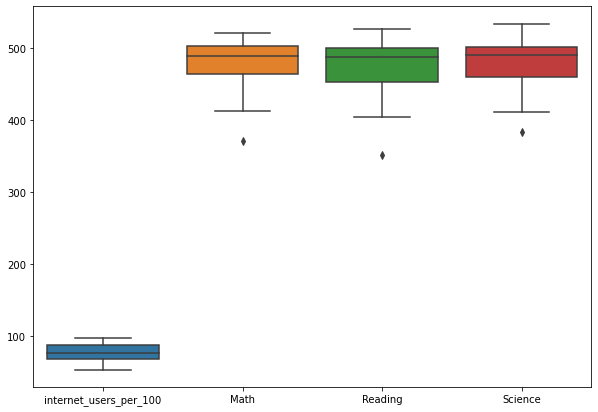

In [181]:
fig = plt.subplots(figsize=(10, 7))

sns.boxplot(data=pisa_EU)

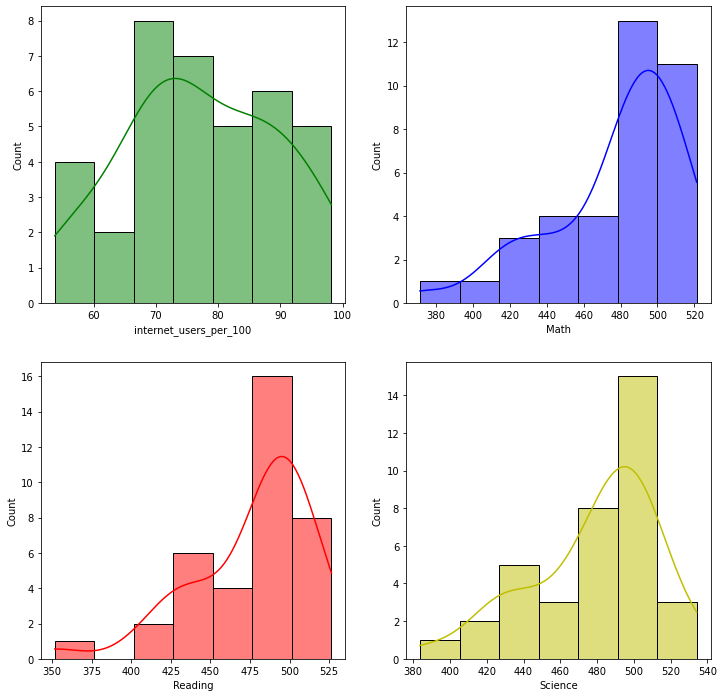

In [182]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

sns.histplot(data=pisa_EU, x="internet_users_per_100", color="g", kde=True,  ax=axs[0, 0])
sns.histplot(data=pisa_EU, x="Math", color="b", kde=True,  ax=axs[0, 1])
sns.histplot(data=pisa_EU, x="Reading", color="r", kde=True,  ax=axs[1, 0])
sns.histplot(data=pisa_EU, x="Science", color="y", kde=True,  ax=axs[1, 1]);

# Analysis for AS

In [183]:
pisa_AS = pisa[pisa["Continent_Code"]=="AS"]
pisa_AS.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
11,CHN,AS,50.300000,531.2961,493.9412,517.7793
25,GEO,AS,47.569760,403.8332,401.2881,411.1315
27,HKG,AS,84.948353,547.9310,526.6753,523.2774
30,IDN,AS,21.976068,386.1096,397.2595,403.0997


In [184]:
pisa_AS.describe()

,internet_users_per_100,Math,Reading,Science
count,17.000000,17.000000,17.000000,17.000000
mean,68.455613,466.216647,454.059682,467.945847
std,21.086060,64.356490,57.048962,56.671371
min,21.976068,380.259000,346.549000,386.485400
25%,50.300000,403.833200,408.102200,417.611200
50%,74.000000,459.816000,433.542300,456.483600
75%,84.948353,531.296100,508.690500,523.277400
max,92.884826,564.189700,535.100200,555.574700


In [185]:
pisa_AS.shape

(17, 6)

In [186]:
pisa_AS.var()

internet_users_per_100     444.621918
Math                      4141.757822
Reading                   3254.584049
Science                   3211.644321
dtype: float64

<AxesSubplot:>

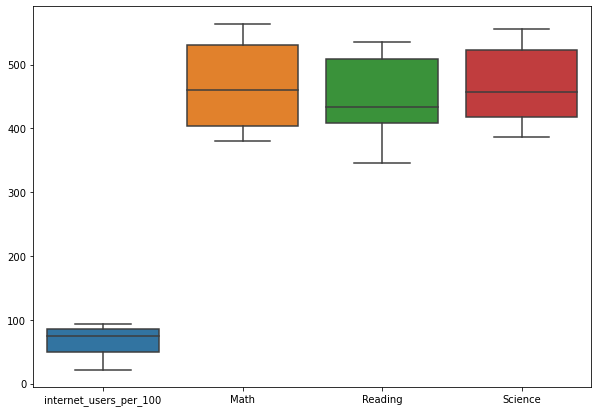

In [188]:
fig = plt.subplots(figsize=(10, 7))

sns.boxplot(data=pisa_AS)

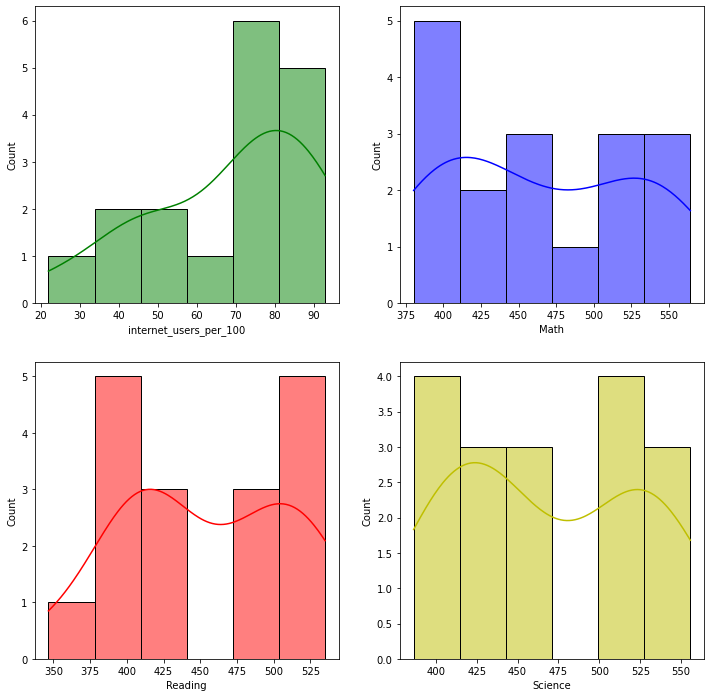

In [189]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

sns.histplot(data=pisa_AS, x="internet_users_per_100", color="g", kde=True,  ax=axs[0, 0])
sns.histplot(data=pisa_AS, x="Math", color="b", kde=True,  ax=axs[0, 1])
sns.histplot(data=pisa_AS, x="Reading", color="r", kde=True,  ax=axs[1, 0])
sns.histplot(data=pisa_AS, x="Science", color="y", kde=True,  ax=axs[1, 1]);

# Analysis for SA

In [190]:
pisa_SA = pisa[pisa["Continent_Code"]=="SA"]
pisa_SA.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
7,BRA,SA,58.327952,377.0695,407.3486,400.6821
10,CHL,SA,64.289000,422.6714,458.5709,446.9561
12,COL,SA,55.904973,389.6438,424.9052,415.7288
53,PER,SA,40.900000,386.5606,397.5414,396.6836


In [191]:
pisa_SA.describe()

,internet_users_per_100,Math,Reading,Science
count,7.000000,7.000000,7.000000,7.000000
mean,60.180494,402.887700,425.359229,421.747186
std,9.772455,18.128894,19.709688,18.470319
min,40.900000,377.069500,397.541400,396.683600
25%,57.116462,388.102200,416.126900,408.205450
50%,64.289000,409.033300,425.303100,424.590500
75%,66.321532,417.617650,431.922700,433.794600
max,69.198471,422.671400,458.570900,446.956100


In [192]:
pisa_SA.shape

(7, 6)

In [193]:
pisa_SA.var()

internet_users_per_100     95.500869
Math                      328.656783
Reading                   388.471816
Science                   341.152678
dtype: float64

<AxesSubplot:>

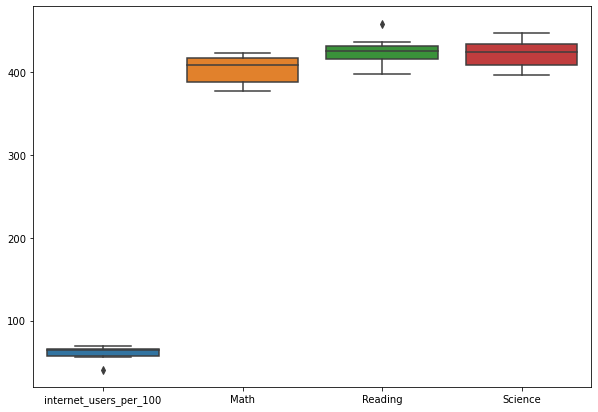

In [195]:
fig = plt.subplots(figsize=(10, 7))

sns.boxplot(data=pisa_SA)

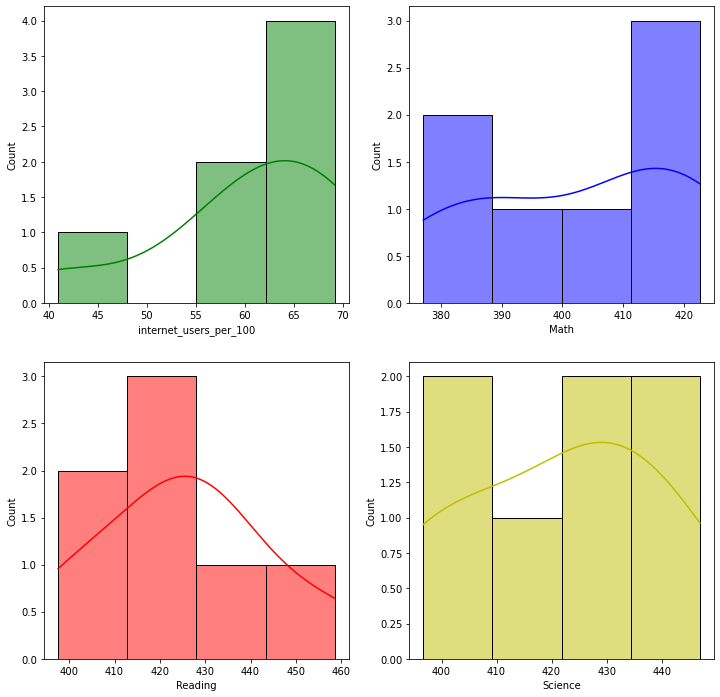

In [196]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

sns.histplot(data=pisa_SA, x="internet_users_per_100", color="g", kde=True,  ax=axs[0, 0])
sns.histplot(data=pisa_SA, x="Math", color="b", kde=True,  ax=axs[0, 1])
sns.histplot(data=pisa_SA, x="Reading", color="r", kde=True,  ax=axs[1, 0])
sns.histplot(data=pisa_SA, x="Science", color="y", kde=True,  ax=axs[1, 1]);

# Analysis for OC

In [197]:
pisa_OC = pisa[pisa["Continent_Code"]=="OC"]
pisa_OC.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
52,NZL,OC,88.222889,495.2233,509.2707,513.3035


In [198]:
pisa_OC.describe()

,internet_users_per_100,Math,Reading,Science
count,2.000000,2.000000,2.000000,2.000000
mean,86.391704,494.559750,506.085650,511.648700
std,2.589686,0.938401,4.504341,2.340241
min,84.560519,493.896200,502.900600,509.993900
25%,85.476112,494.227975,504.493125,510.821300
50%,86.391704,494.559750,506.085650,511.648700
75%,87.307296,494.891525,507.678175,512.476100
max,88.222889,495.223300,509.270700,513.303500


In [199]:
pisa_OC.shape

(2, 6)

In [200]:
pisa_OC.var()

internet_users_per_100     6.706475
Math                       0.880597
Reading                   20.289087
Science                    5.476726
dtype: float64

<AxesSubplot:>

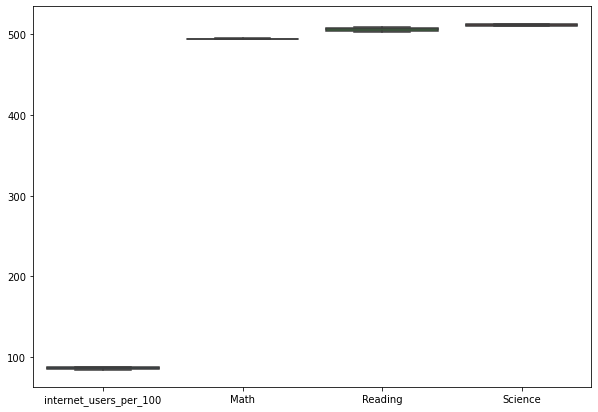

In [201]:
fig = plt.subplots(figsize=(10, 7))

sns.boxplot(data=pisa_OC)

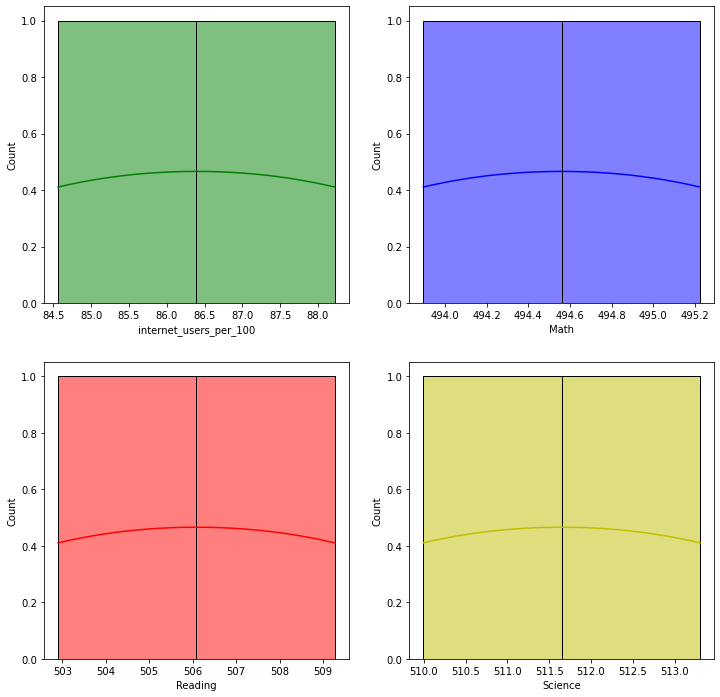

In [202]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

sns.histplot(data=pisa_OC, x="internet_users_per_100", color="g", kde=True,  ax=axs[0, 0])
sns.histplot(data=pisa_OC, x="Math", color="b", kde=True,  ax=axs[0, 1])
sns.histplot(data=pisa_OC, x="Reading", color="r", kde=True,  ax=axs[1, 0])
sns.histplot(data=pisa_OC, x="Science", color="y", kde=True,  ax=axs[1, 1]);

# Analysis for AF

In [203]:
pisa_AF = pisa[pisa["Continent_Code"]=="AF"]
pisa_AF.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
19,DZA,AF,38.200000,359.6062,349.8593,375.7451
65,TUN,AF,48.519836,366.8180,361.0555,386.4034


In [204]:
pisa_AF.describe()

,internet_users_per_100,Math,Reading,Science
count,2.000000,2.000000,2.000000,2.000000
mean,43.359918,363.212100,355.457400,381.074250
std,7.297226,5.099513,7.916909,7.536556
min,38.200000,359.606200,349.859300,375.745100
25%,40.779959,361.409150,352.658350,378.409675
50%,43.359918,363.212100,355.457400,381.074250
75%,45.939877,365.015050,358.256450,383.738825
max,48.519836,366.818000,361.055500,386.403400


In [205]:
pisa_AF.shape

(2, 6)

In [206]:
pisa_AF.var()

internet_users_per_100    53.249507
Math                      26.005030
Reading                   62.677447
Science                   56.799679
dtype: float64

<AxesSubplot:>

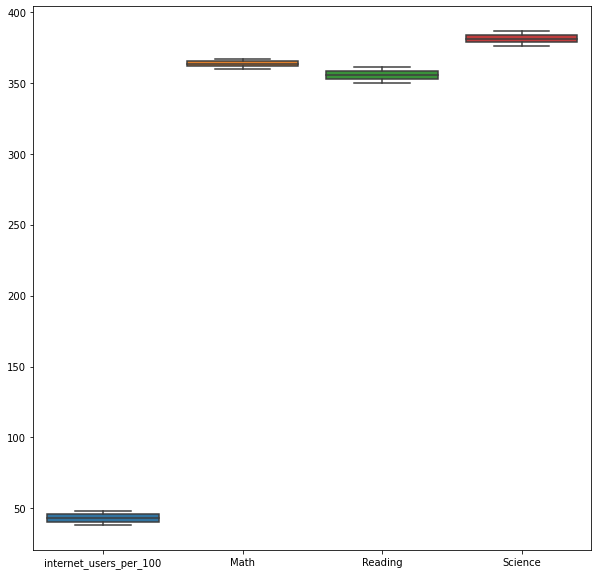

In [211]:
fig = plt.subplots(figsize=(10, 10))

sns.boxplot(data=pisa_AF)

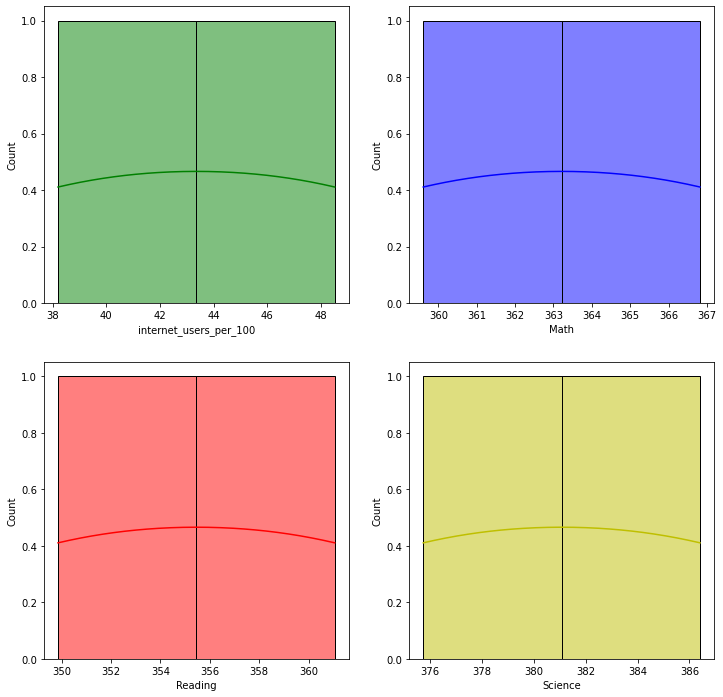

In [212]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

sns.histplot(data=pisa_AF, x="internet_users_per_100", color="g", kde=True,  ax=axs[0, 0])
sns.histplot(data=pisa_AF, x="Math", color="b", kde=True,  ax=axs[0, 1])
sns.histplot(data=pisa_AF, x="Reading", color="r", kde=True,  ax=axs[1, 0])
sns.histplot(data=pisa_AF, x="Science", color="y", kde=True,  ax=axs[1, 1]);

## 2.	Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.

In [213]:
statistic_value, p_value = stats.ttest_ind(pisa_EU.Math, pisa_AS.Math, nan_policy='omit')  # independent t test

statistic_value, p_value

(0.870055317967983, 0.38826888111307345)

When we look at the standard normal table(z tabble), at .05% level of significance of the two-tailed critical value is tα/2 = .05/2 = .025 = 1.965. It is our t-value.

In [214]:
t_pvalue = 0.025

if p_value < t_pvalue:
    print("Reject the Null")
else:
    print("Fail to reject")

Fail to reject


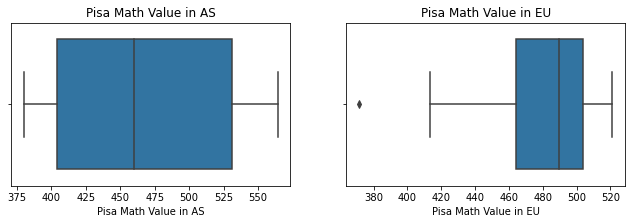

In [62]:
fig, axes = plt.subplots(1,2, figsize=(11,3))

sns.boxplot(pisa_AS['Math'], ax=axes[0]).set(title='Pisa Math Value in AS')
sns.boxplot(pisa_EU['Math'], ax=axes[1]).set(title='Pisa Math Value in EU')

axes[0].set(xlabel='Pisa Math Value in AS')
axes[1].set(xlabel='Pisa Math Value in EU')
plt.show();

# EXERCISE 4.The sample dataset has placement test scores (out of 100 points) for four subject areas: English, Reading, Math, and Writing. Students in the sample completed all 4 placement tests when they enrolled in the university. Suppose we are particularly interested in the English and Math sections, and want to determine whether students tended to score higher on their English or Math test, on average. We could use a paired t test to test if there was a significant difference in the average of the two tests.
Sample Dataset 2014
CHECK: statistic=36.312568981719856, pvalue=3.0710987192210606e-128


In [215]:
std= pd.read_csv("students.csv")
std.head()

,ids,bday,enrolldate,expgradate,Rank,Major,Gender,Athlete,Height,Weight,...,English,Reading,Math,Writing,State,LiveOnCampus,HowCommute,CommuteTime,SleepTime,StudyTime
0,43783,3/22/1995,NaN,NaN,NaN,NaN,0.0,0,72.35,NaN,...,88.24,81.50,60.02,81.44,In state,1.0,NaN,NaN,7.0,1.0
1,20278,1/1/1995,NaN,NaN,NaN,Philosophy,0.0,0,70.66,179.20,...,89.45,85.25,70.19,73.27,NaN,1.0,NaN,NaN,5.0,2.0
2,20389,12/31/1994,NaN,NaN,NaN,NaN,0.0,0,70.68,198.52,...,96.73,86.88,71.20,84.24,In state,NaN,NaN,NaN,8.0,7.0
3,22820,12/1/1994,NaN,NaN,NaN,business administration,1.0,0,NaN,198.34,...,74.06,88.68,55.89,73.16,In state,1.0,NaN,NaN,2.0,6.0
4,24559,11/10/1994,NaN,NaN,NaN,NaN,1.0,1,67.43,128.17,...,82.61,77.30,65.52,80.45,Out of state,1.0,NaN,NaN,7.0,3.0


In [216]:
std.describe()

,ids,Rank,Gender,Athlete,Height,Weight,Smoking,Sprint,English,Reading,Math,Writing,LiveOnCampus,HowCommute,CommuteTime,SleepTime,StudyTime
count,435.000000,406.000000,426.000000,435.000000,408.000000,376.000000,411.000000,374.000000,409.000000,425.000000,422.000000,404.000000,414.000000,247.000000,247.000000,403.000000,393.000000
mean,35279.022989,2.199507,0.521127,0.422989,68.031765,181.031569,0.430657,6.581933,82.787555,82.070800,65.468009,79.521683,0.410628,2.781377,27.000000,5.461538,7.208651
std,8637.733605,1.098641,0.500141,0.494602,5.325655,42.749680,0.766324,1.227069,6.839803,7.661778,8.375930,5.511410,0.492543,0.698996,10.072905,2.421994,4.356233
min,20183.000000,1.000000,0.000000,0.000000,55.000000,101.710000,0.000000,4.503000,59.830000,55.110000,35.320000,64.060000,0.000000,1.000000,4.000000,0.000000,0.000000
25%,28001.000000,1.000000,0.000000,0.000000,64.827500,153.860000,0.000000,5.587500,78.330000,77.190000,60.202500,75.750000,0.000000,3.000000,21.000000,4.000000,4.000000
50%,35350.000000,2.000000,1.000000,0.000000,67.570000,172.960000,0.000000,6.569000,83.150000,81.940000,65.445000,79.035000,0.000000,3.000000,27.000000,5.000000,6.000000
75%,42655.500000,3.000000,1.000000,1.000000,71.575000,204.307500,1.000000,7.458000,87.170000,87.080000,70.567500,83.687500,1.000000,3.000000,32.000000,7.000000,10.000000
max,49947.000000,4.000000,1.000000,1.000000,84.410000,350.070000,2.000000,9.597000,101.950000,103.620000,93.780000,93.010000,1.000000,4.000000,64.000000,13.000000,23.000000


In [217]:
std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ids           435 non-null    int64  
 1   bday          427 non-null    object 
 2   enrolldate    406 non-null    object 
 3   expgradate    406 non-null    object 
 4   Rank          406 non-null    float64
 5   Major         276 non-null    object 
 6   Gender        426 non-null    float64
 7   Athlete       435 non-null    int64  
 8   Height        408 non-null    float64
 9   Weight        376 non-null    float64
 10  Smoking       411 non-null    float64
 11  Sprint        374 non-null    float64
 12  MileMinDur    392 non-null    object 
 13  English       409 non-null    float64
 14  Reading       425 non-null    float64
 15  Math          422 non-null    float64
 16  Writing       404 non-null    float64
 17  State         408 non-null    object 
 18  LiveOnCampus  414 non-null    

In [218]:
std.shape

(435, 23)

In [219]:
std[["English", "Math"]].isnull().value_counts()

English  Math 
False    False    398
True     False     24
False    True      11
True     True       2
dtype: int64

In [220]:
std_drop = std[["English", "Math"]].dropna()
std_drop.head()

,English,Math
0,88.24,60.02
1,89.45,70.19
2,96.73,71.20
3,74.06,55.89
4,82.61,65.52


In [221]:
std_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 434
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   English  398 non-null    float64
 1   Math     398 non-null    float64
dtypes: float64(2)
memory usage: 9.3 KB


In [222]:
std[["English", "Math"]].describe()

,English,Math
count,409.000000,422.000000
mean,82.787555,65.468009
std,6.839803,8.375930
min,59.830000,35.320000
25%,78.330000,60.202500
50%,83.150000,65.445000
75%,87.170000,70.567500
max,101.950000,93.780000


In [223]:
mean_eng=std.English.mean()
mean_eng

82.78755501222493

In [224]:
mean_math= std.Math.mean()
mean_math

65.46800947867297

In [225]:
diff = mean_eng - mean_math
diff

17.31954553355196

Ho: muEnglish - muMath = 0 ("the differences of the two lesson's value is equal to 0")

H1: muEnglish - muMath != 0 ("the differences of the two lesson's value is not equal to 0")

First of all, we should choose the significance level (alpha= α). I want to choose alpha= α = 0.05.

In [226]:
stats.ttest_ind(std.dropna()["English"], std.dropna()["Math"])

Ttest_indResult(statistic=10.787205641803522, pvalue=1.1746036768217507e-18)

In [227]:
paired_value= stats.ttest_rel(std["English"], std["Math"], nan_policy='omit')
paired_value

Ttest_relResult(statistic=36.31256898171986, pvalue=3.071098719220689e-128)

In [228]:
p_value = paired_value.pvalue
p_value

3.071098719220689e-128

In [229]:
critic_p_value = 0.025

if p_value < critic_p_value:
    print("Reject the Null")
else:
    print("Fail to reject")

Reject the Null
